In [1]:
import sys
import yaml

from torch.utils.data import DataLoader
from torchvision import datasets, transforms

sys.path.append('../src')
sys.path.append('../../../utils')
from simple_cnn import SimpleCnn
from train_utils import Trainer
from eval_utils import get_top_k_accuracy, evaluate_model

In [2]:

with open('../configs/train_config.yaml', 'r') as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

# Load dataset.

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.25)
])

train_dataset = datasets.FashionMNIST(root='../../../data/fashion_mnist',
                                train=True,
                                transform=transform,
                                download=True)

test_dataset = datasets.FashionMNIST(root='../../../data/fashion_mnist',
                                train=False,
                                transform=transform,
                                download=True)

# Load model.
model = SimpleCnn()
trainer = Trainer(model, train_dataset, config)
result = trainer.train()

100%|██████████| 50/50 [09:14<00:00, 11.09s/it]


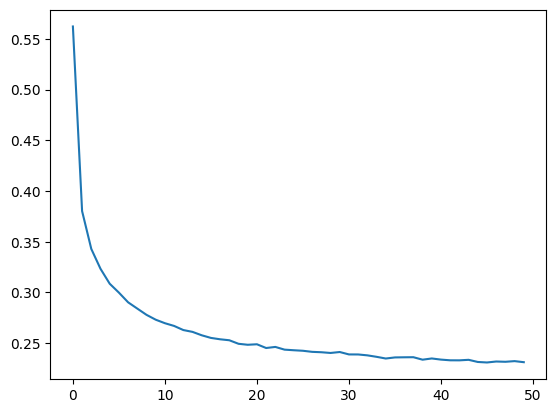

In [3]:
import matplotlib.pyplot as plt

plt.plot(result['loss_history'])

In [4]:
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)
y_pred_train, y_true_train = evaluate_model(model, train_loader)
y_pred_test, y_true_test = evaluate_model(model, test_loader)

In [5]:
print(get_top_k_accuracy(y_pred_train, y_true_train, 1))
print(get_top_k_accuracy(y_pred_test, y_true_test, 1))
print(get_top_k_accuracy(y_pred_train, y_true_train, 2))
print(get_top_k_accuracy(y_pred_test, y_true_test, 2))

91.09833240509033
88.95999789237976
98.12333583831787
97.22999930381775
